## Домашнее задание № 1 
### «Построение координатного закона поражения осколочного боеприпаса естественного дробления»

#### Вариант №7
##### Исходные данные.

In [1]:
import numpy as np # Подключение библиотеки для
# работы с таблицами

In [2]:
M_0 = 36*1000 #г Масса корпуса
TETA_c = 50 #град Угол падения
V_c = 300 #м/с скорость падения 
F = 1.6 # Параметр формы
n = 4 # Показатель крутизны
S_0 = 0.5 # Площадь проекции цели на картинную 
# плоскость
h0_st = 4 # Стальной эквивалент пробития цели
m = np.array([1, 2, 5, 10, 20]) #г Распределение 
# масс по фракциям "Осколочно-фугасные снаряды 
# сред-них и крупных калибров"
mu = np.array([0.1, 0.17, 0.33, 0.22, 0.18])#г Распределение 
# масс по фракциям

In [3]:
# Передние углы угловых зон в статике (град)
fi_1 = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160])
# Задние углы угловых зон в статике (град)
fi_2 = fi_1 + 20
# Средний угол зоны в статике (град)
fi = (fi_1 + fi_2)/2
# Средняя начальная скорость осколков по зонам 
# в статике (м/с)
v_0 = np.array([820, 890, 950, 1020, 1100, 1000, 860, 710, 530])

In [4]:
# Передний угол зоны в динамике, град
gamma_1 = np.arctan((v_0*np.sin(fi_1*np.pi/180.)) / (V_c + v_0*np.cos(fi_1*np.pi/180.)))*180./np.pi
gamma_1[gamma_1 < 0] += 180 # Приведение отрицательных
# к тупым
# Передний угол зоны в динамике, град
gamma_2 = np.arctan((v_0*np.sin(fi_2*np.pi/180.)) / (V_c + v_0*np.cos(fi_2*np.pi/180.)))*180./np.pi
gamma_2[gamma_2 <= 0] += 180 # Приведение отрицательных
# к тупым

# Средний угол зоны в динамике(град)
gamma = (gamma_1 + gamma_2) / 2

In [5]:
# Средняя результирующая скорость в угловой зоне
# (м/с)
v_d = (V_c**2 + 2*v_0*V_c*np.cos(gamma*np.pi/180.) + v_0**2) ** (0.5)

In [6]:
# Средний угол на местности (град)
# Под аркосинусное выражение
u_ac = np.cos(gamma*np.pi/180.)/np.cos(TETA_c*np.pi/180.)
# Сам Средний угол на местности (град)
ksi = np.arccos(u_ac[(u_ac>=-1) & (u_ac<=1)])*180./np.pi

In [7]:
# Относительная масса осколков на местности 
mu_r = np.array([0.02, 0.03, 0.05, 0.1, 0.28, 0.32, 0.12, 0.02, 0.06])
# Масса осколков на местности г 
M = M_0*mu_r

In [8]:
# Паспорт угловой зоны (Создаем матрицу по 2й оси (по j))
#r = np.array([5, 10, 15, 20, 25, 30, 40, 50, 60], ndmin=2).T
r = np.array(np.linspace(5, 60, 55), ndmin=2).T

In [9]:
# Характеристики фракции запускаем по третей оси (по k)
A = (0.03 / (m ** (1/3))).reshape((5,1,1))
M_fr = M*(mu.reshape((5,1,1)))
N = M_fr / (m.reshape((5,1,1)))
# Динамическая плотность
P_d = N / (2*np.pi*(r**2)*(np.cos(gamma_1*np.pi/180.) - np.cos(gamma_2*np.pi/180.)))

In [10]:
# Текущая скорость м/с
v = v_d*np.exp(-A*r)
# Пробиваемая толщина
h = (((m.reshape((5,1,1)))**(1/3))*v)/(155*F)
# Вероятность порожения при попадании
p = 1 - np.exp(-((h/h0_st) ** n))
# Вероятность порожения осколками данной фракции
P = 1 - np.exp(-P_d*S_0*p)
# Первое фракция; Второе радиус; Третье угол

In [11]:
# Координатный закон поражения, вероятность
# порожения хотябы одной фракцией
# схлопываем матрицу произведением по оси где
# фракции
G = 1 - (1 - P).prod(axis=0)
# Первое радиус; Второе угол

In [12]:
#  Импорт модуля для построения графиков
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-whitegrid')

In [13]:
# Функция которая будет строить графики из 5 пункта ДЗ
def Ploter(Y, tit, yl):
    fig = plt.figure(dpi=300, figsize=(8,6))
    ax = plt.axes()
    ax.set_title(tit)
    # 1-я фракция, 3-я угловая зона
    lines = ax.plot(r, Y[0,:,2], label='1-я фракция; 1 г', linestyle='-', alpha=0.8)
    # 2-я фракция, 3-я угловая зона
    lines += ax.plot(r, Y[1,:,2], label='2-я фракция; 2 г', linestyle='-', alpha=0.8)
    # 3-я фракция, 3-я угловая зона
    lines += ax.plot(r, Y[2,:,2], label='3-я фракция; 5 г', linestyle='-', alpha=0.8)
    labels = ['1-я фракция; 1 г', '2-я фракция; 2 г', '3-я фракция; 5 г']

    # 1-я фракция, 5-я угловая зона
    lines += ax.plot(r, Y[0,:,4], label='1-я фракция; 1 г', linestyle='--')
    # 2-я фракция, 5-я угловая зона
    lines += ax.plot(r, Y[1,:,4], label='2-я фракция; 2 г', linestyle='--')
    # 3-я фракция, 5-я угловая зона
    lines += ax.plot(r, Y[2,:,4], label='3-я фракция; 5 г', linestyle='--')

    ax.set(xlabel='r, м', ylabel=yl)

    leg1 = Legend(ax, lines[:3], labels, loc=1, title="3-я угловая зона (40 - 60 град)")
    ax.add_artist(leg1);

    leg2 = Legend(ax, lines[3:], labels, loc=5, title="5-я угловая зона (80 - 100 град)")
    ax.add_artist(leg2);

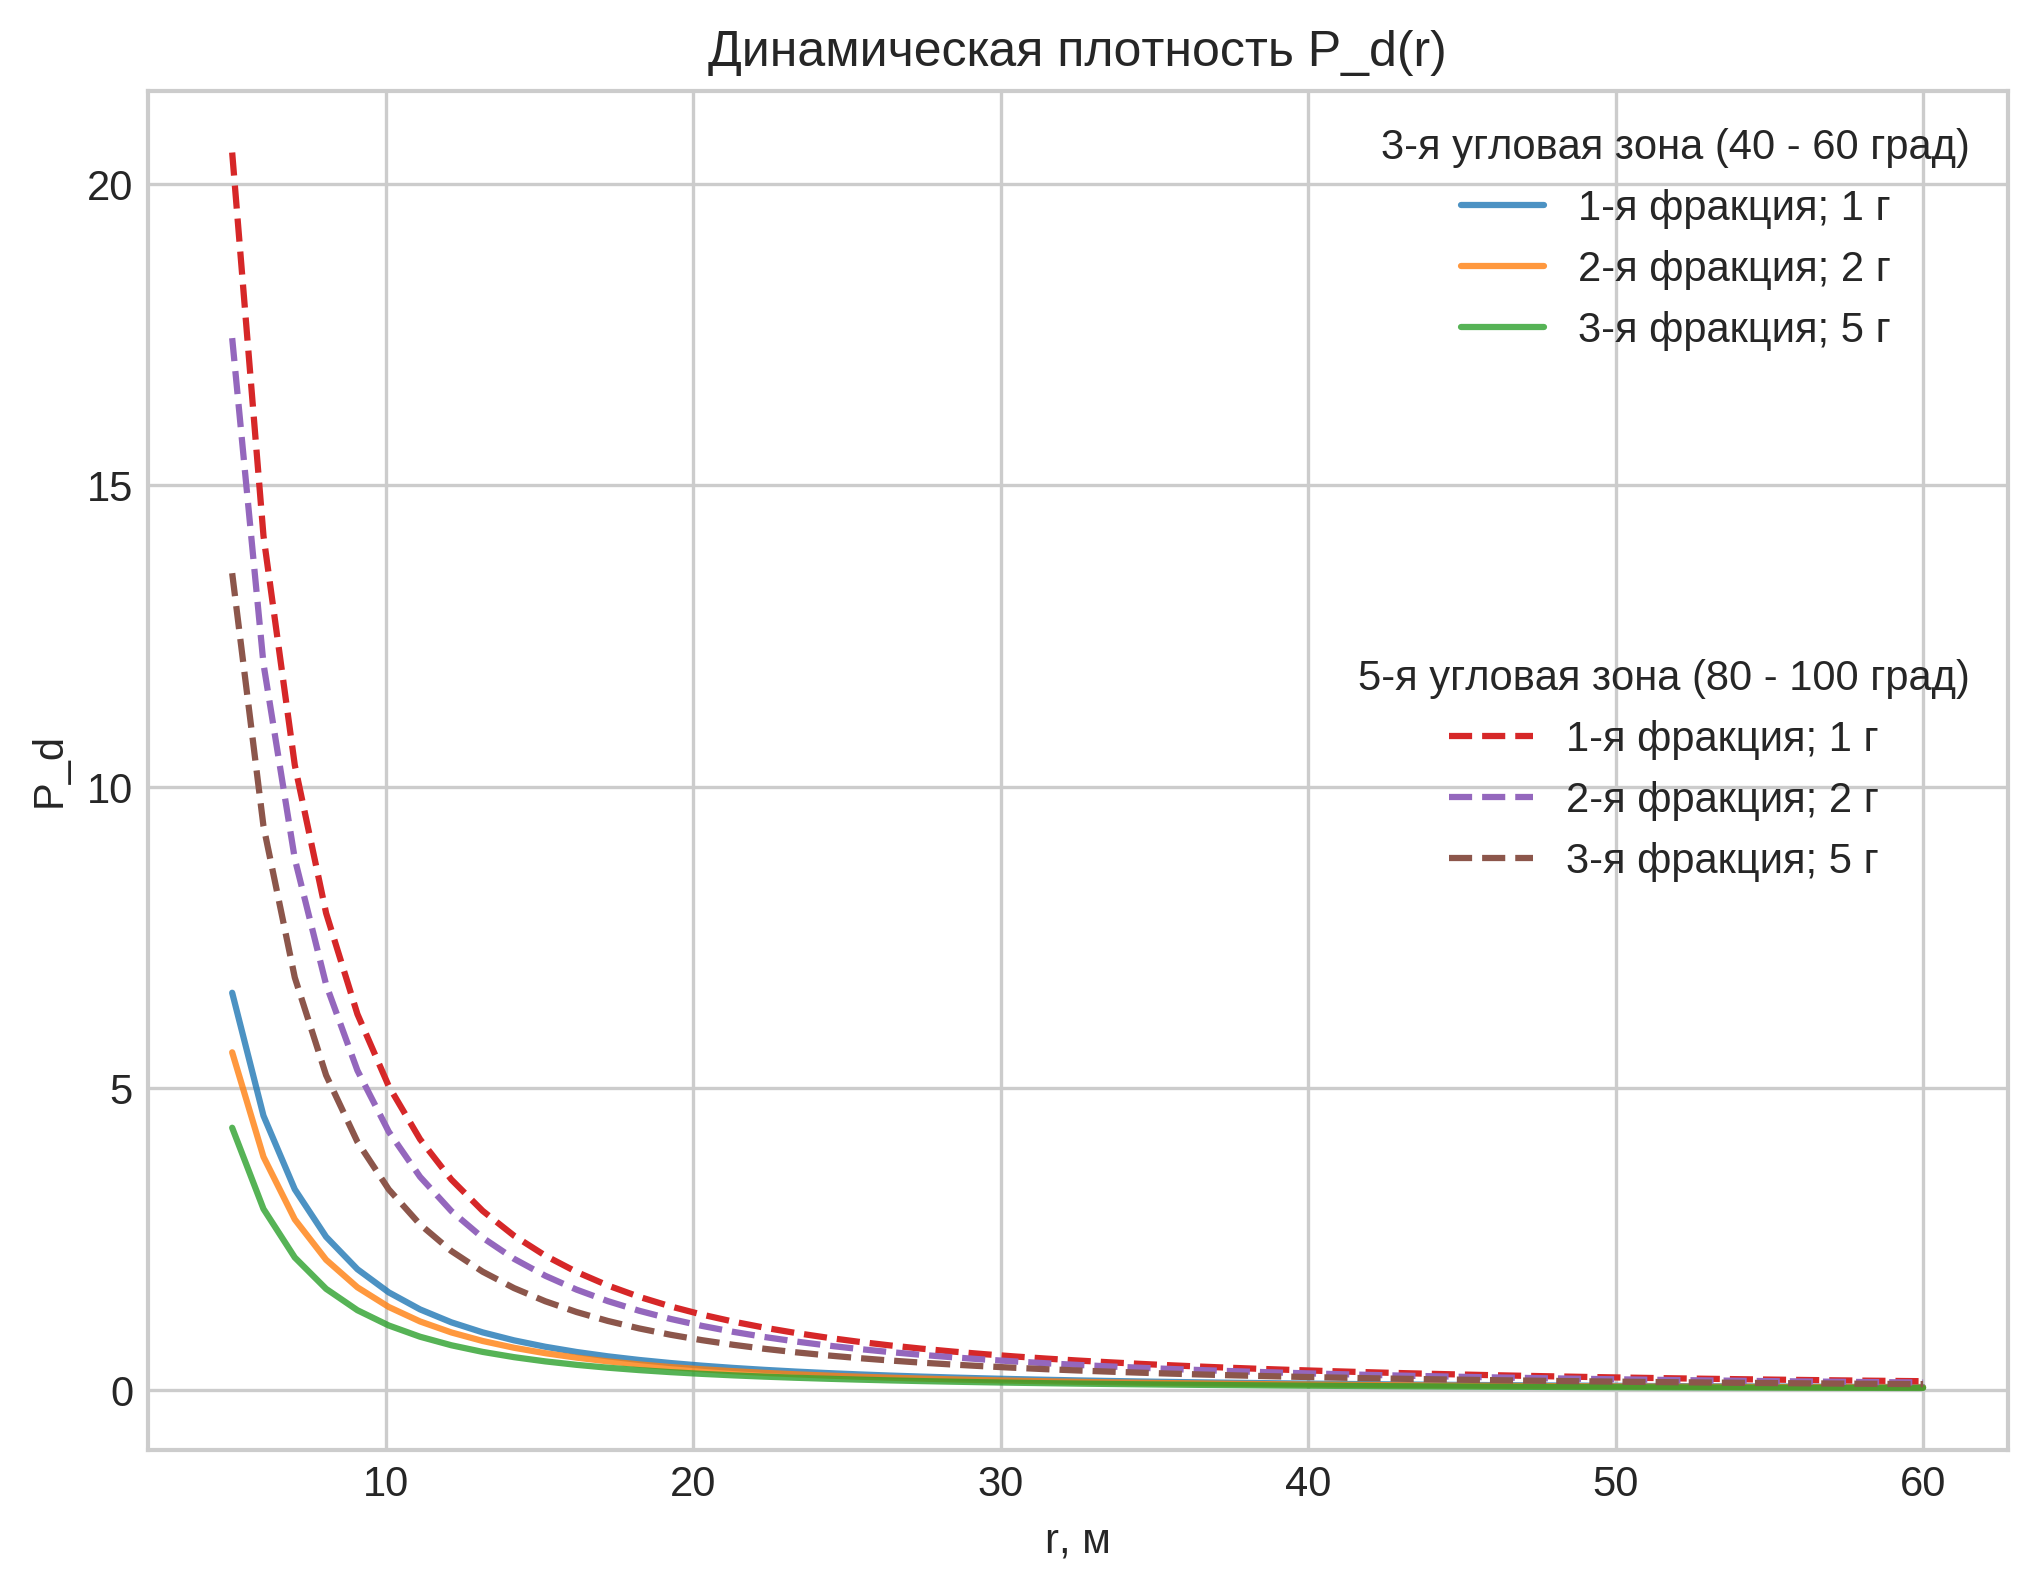

In [14]:
Ploter(P_d, tit="Динамическая плотность P_d(r)", yl="P_d")

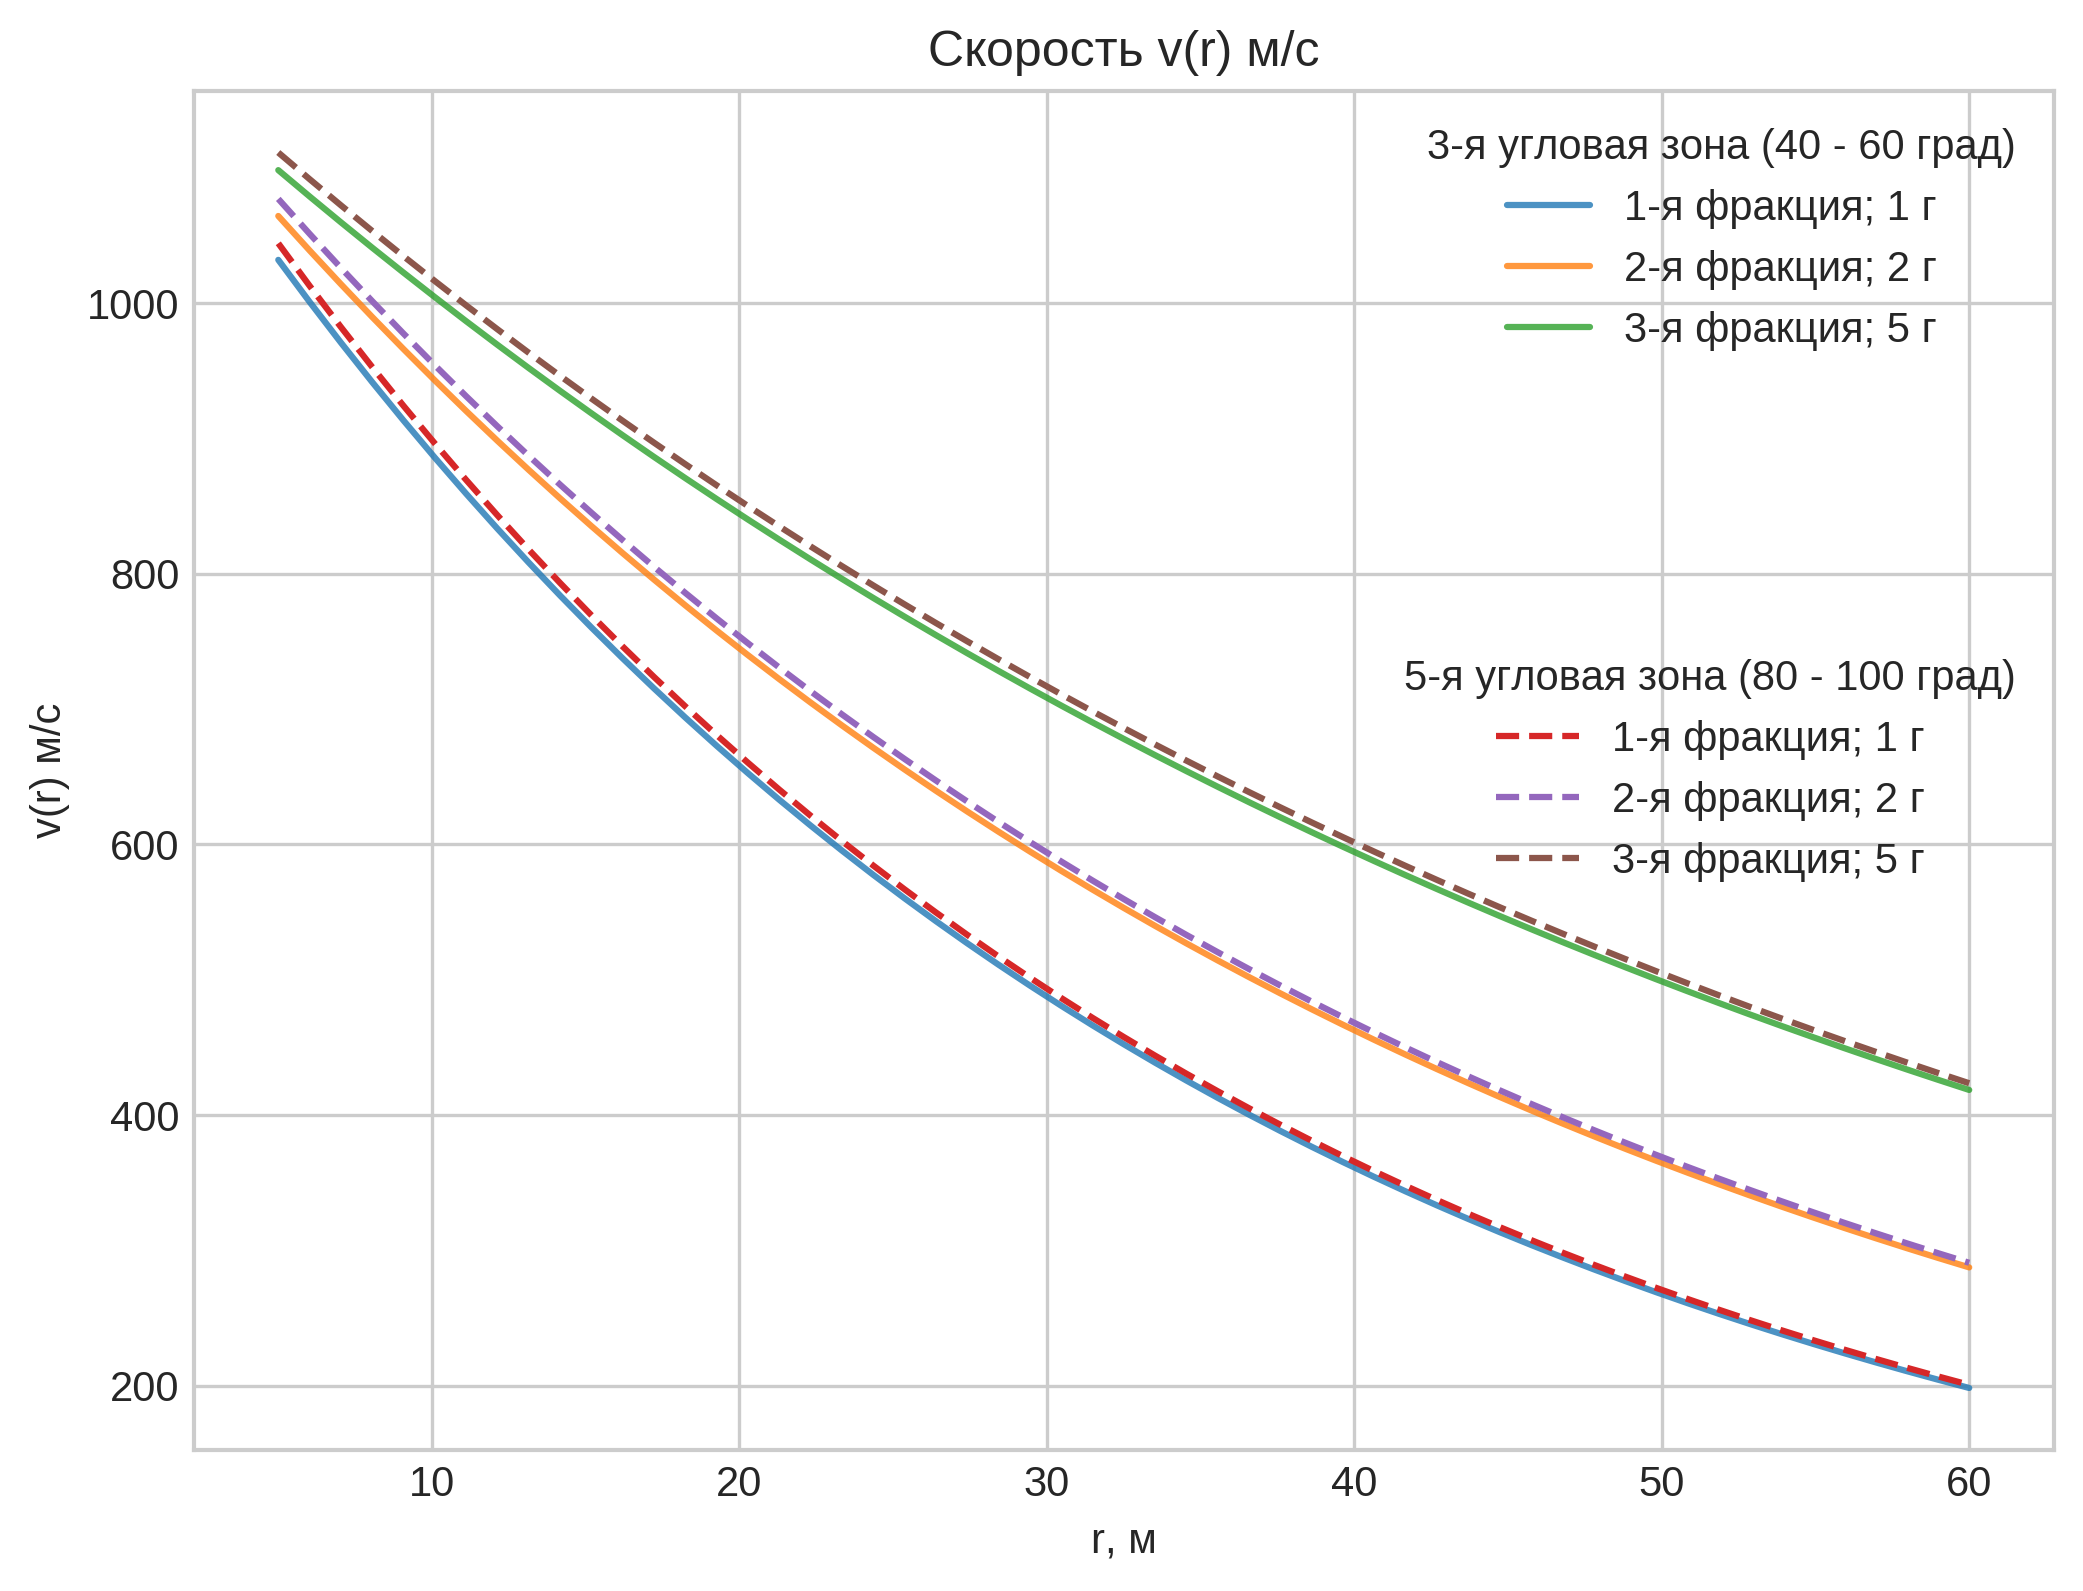

In [15]:
Ploter(v, tit="Скорость v(r) м/с", yl="v(r) м/с")

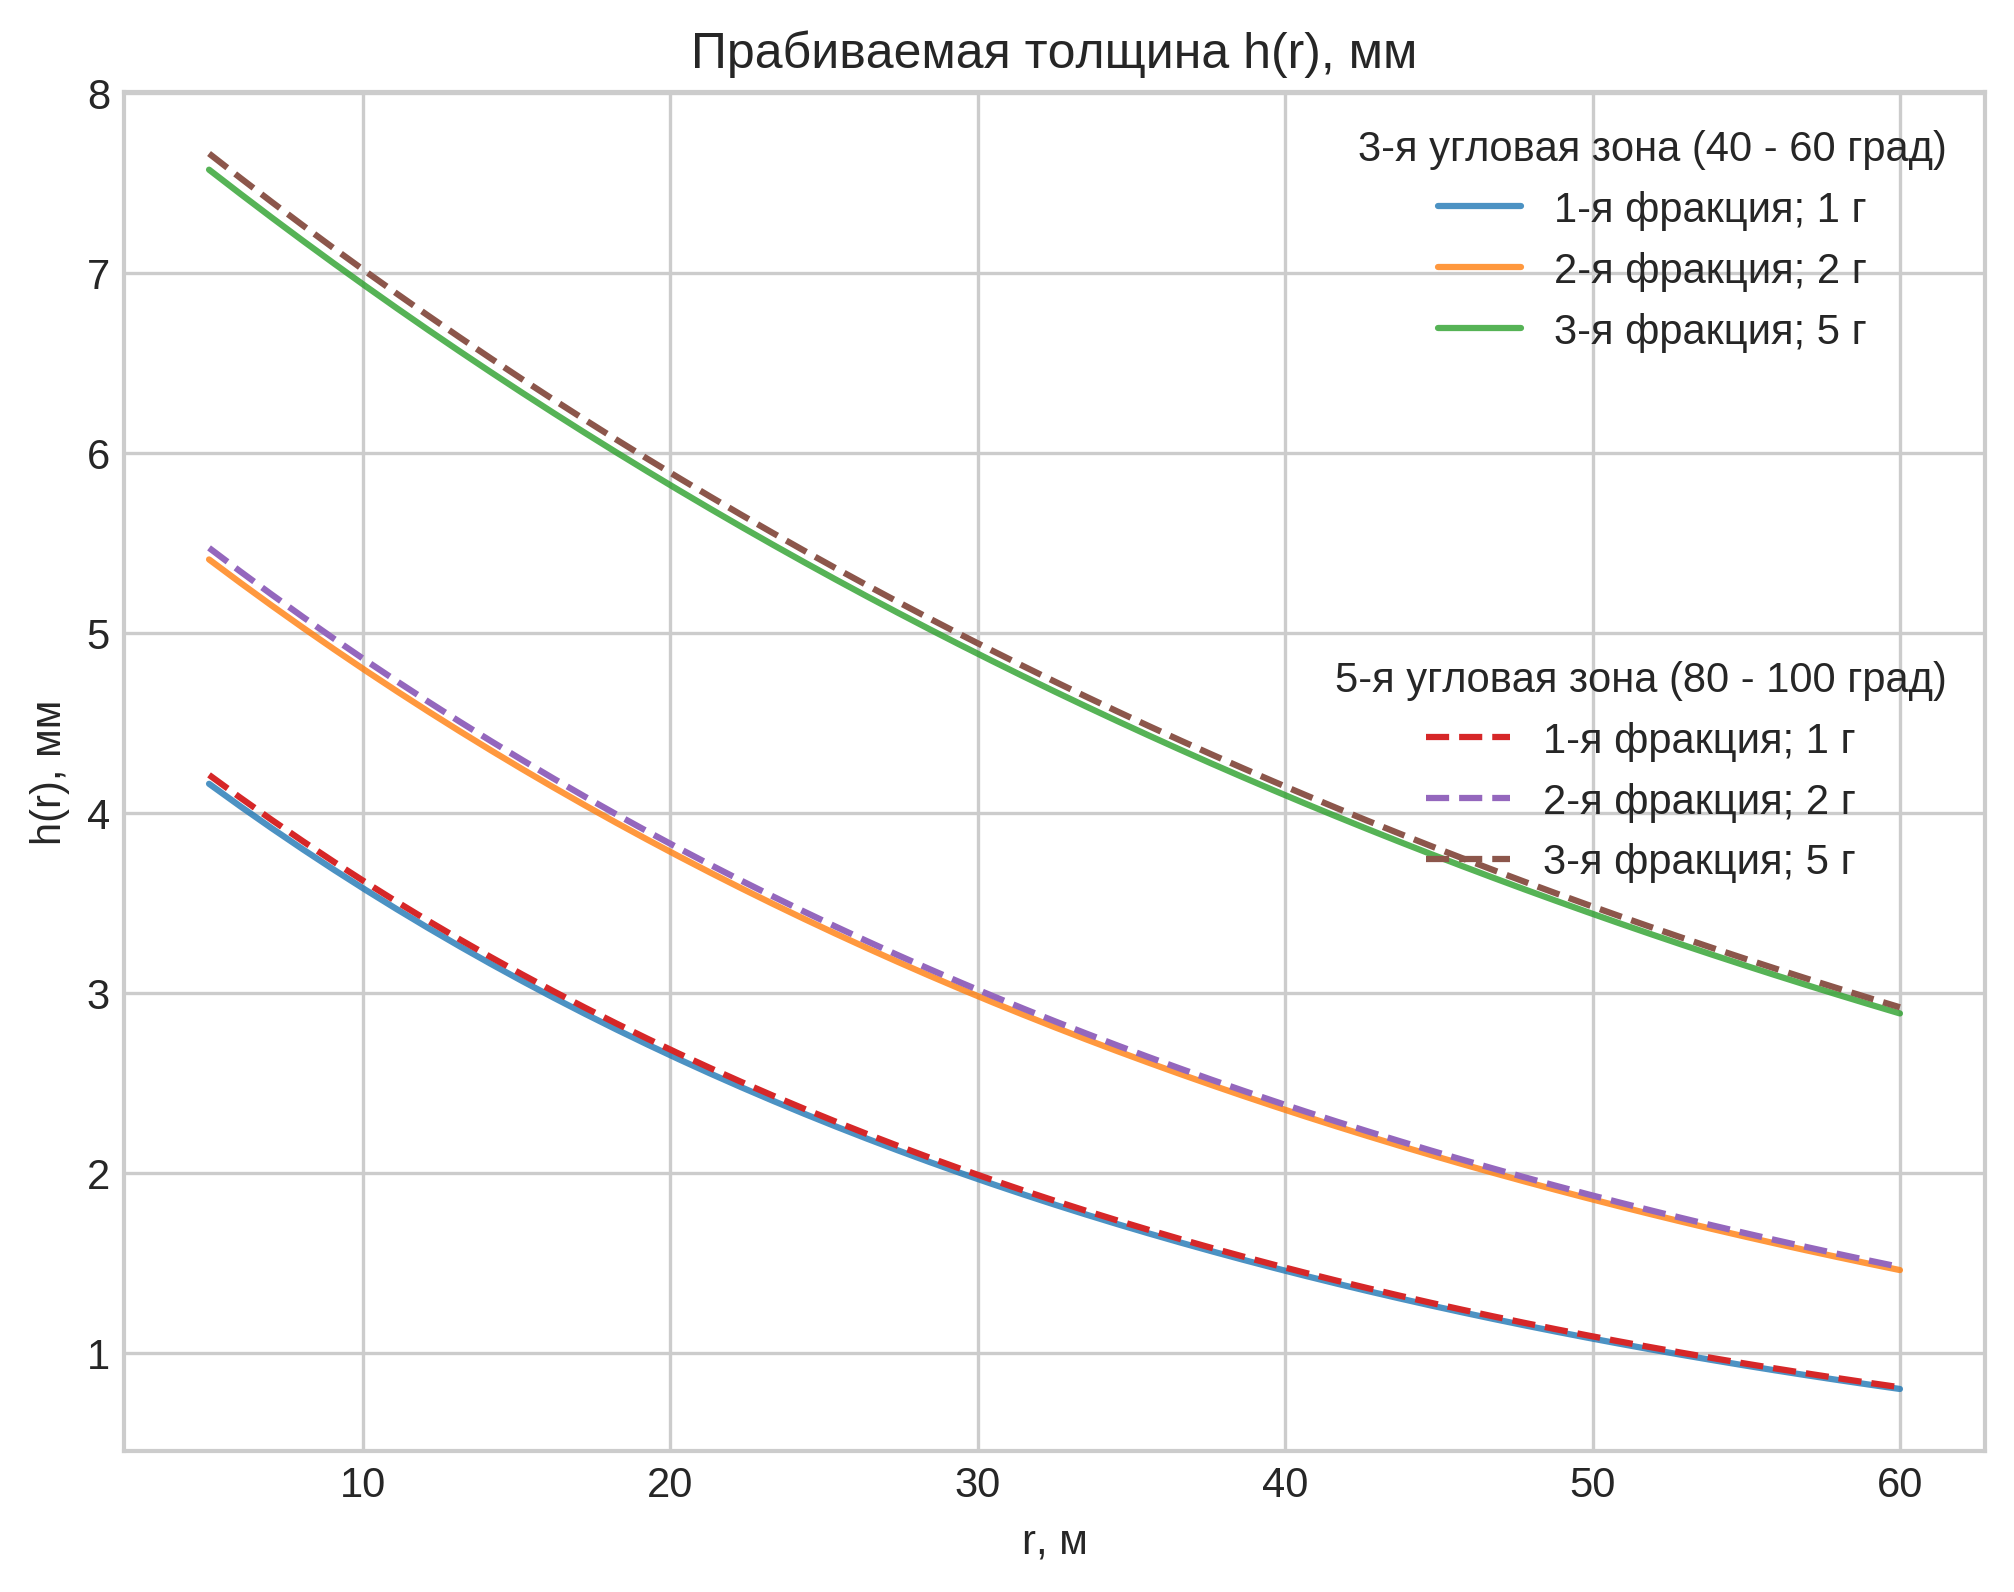

In [16]:
Ploter(h, tit="Прабиваемая толщина h(r), мм", yl="h(r), мм")

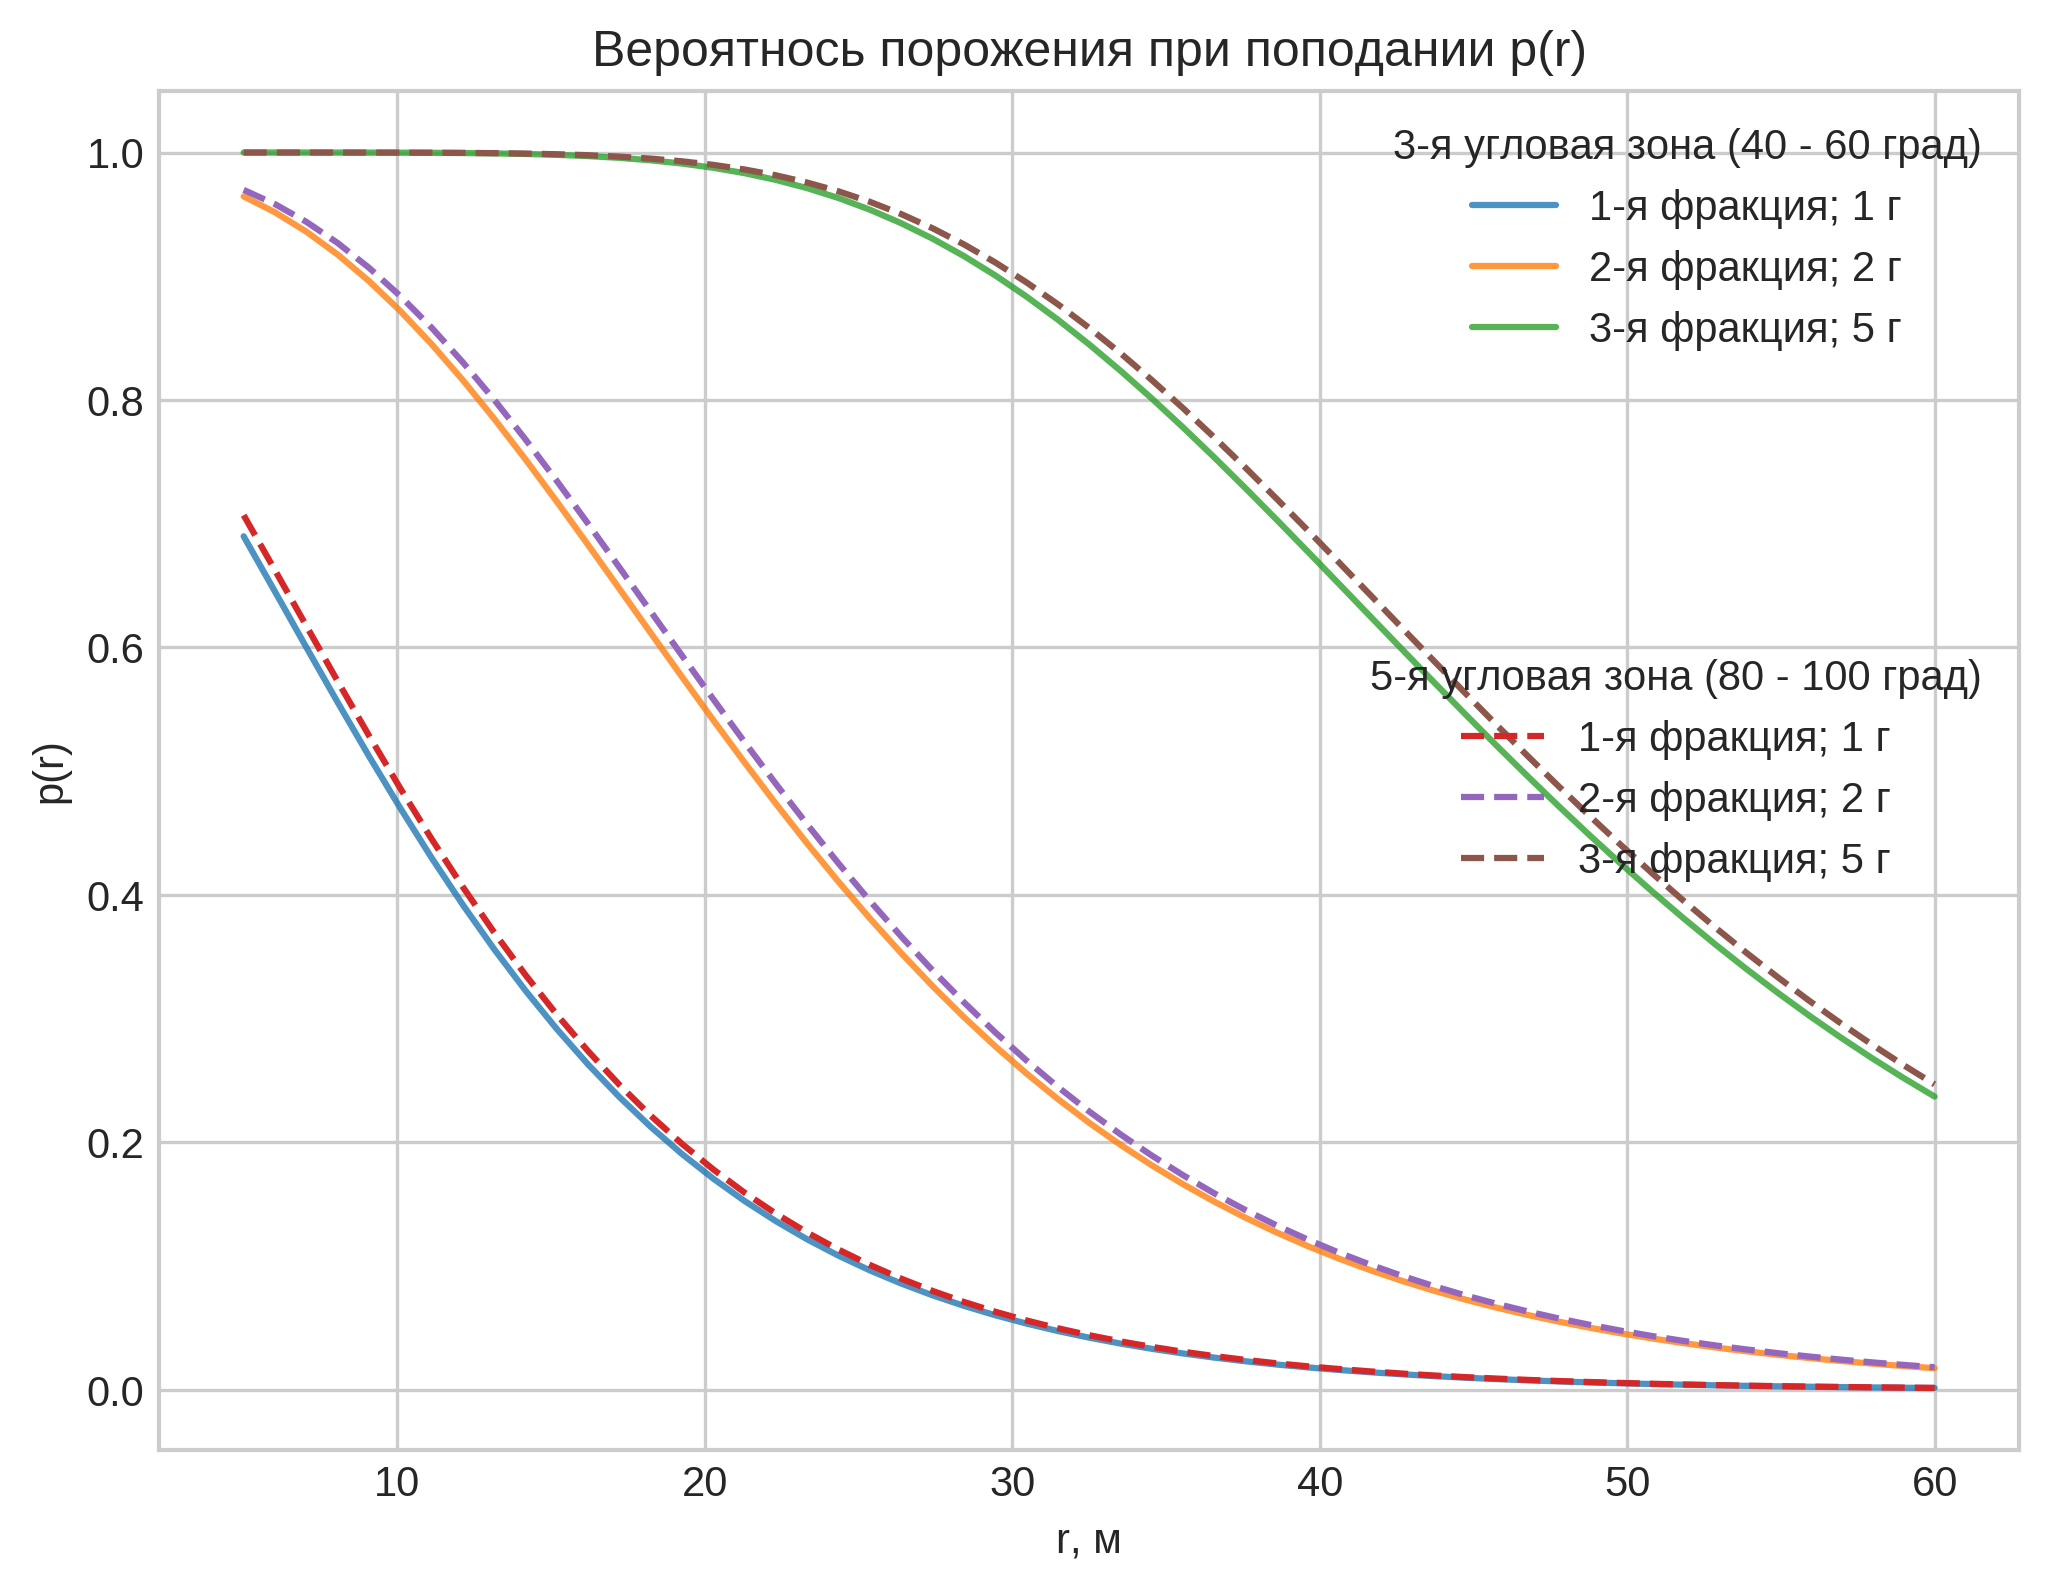

In [17]:
Ploter(p, tit="Вероятнось порожения при поподании p(r)", yl="p(r)")

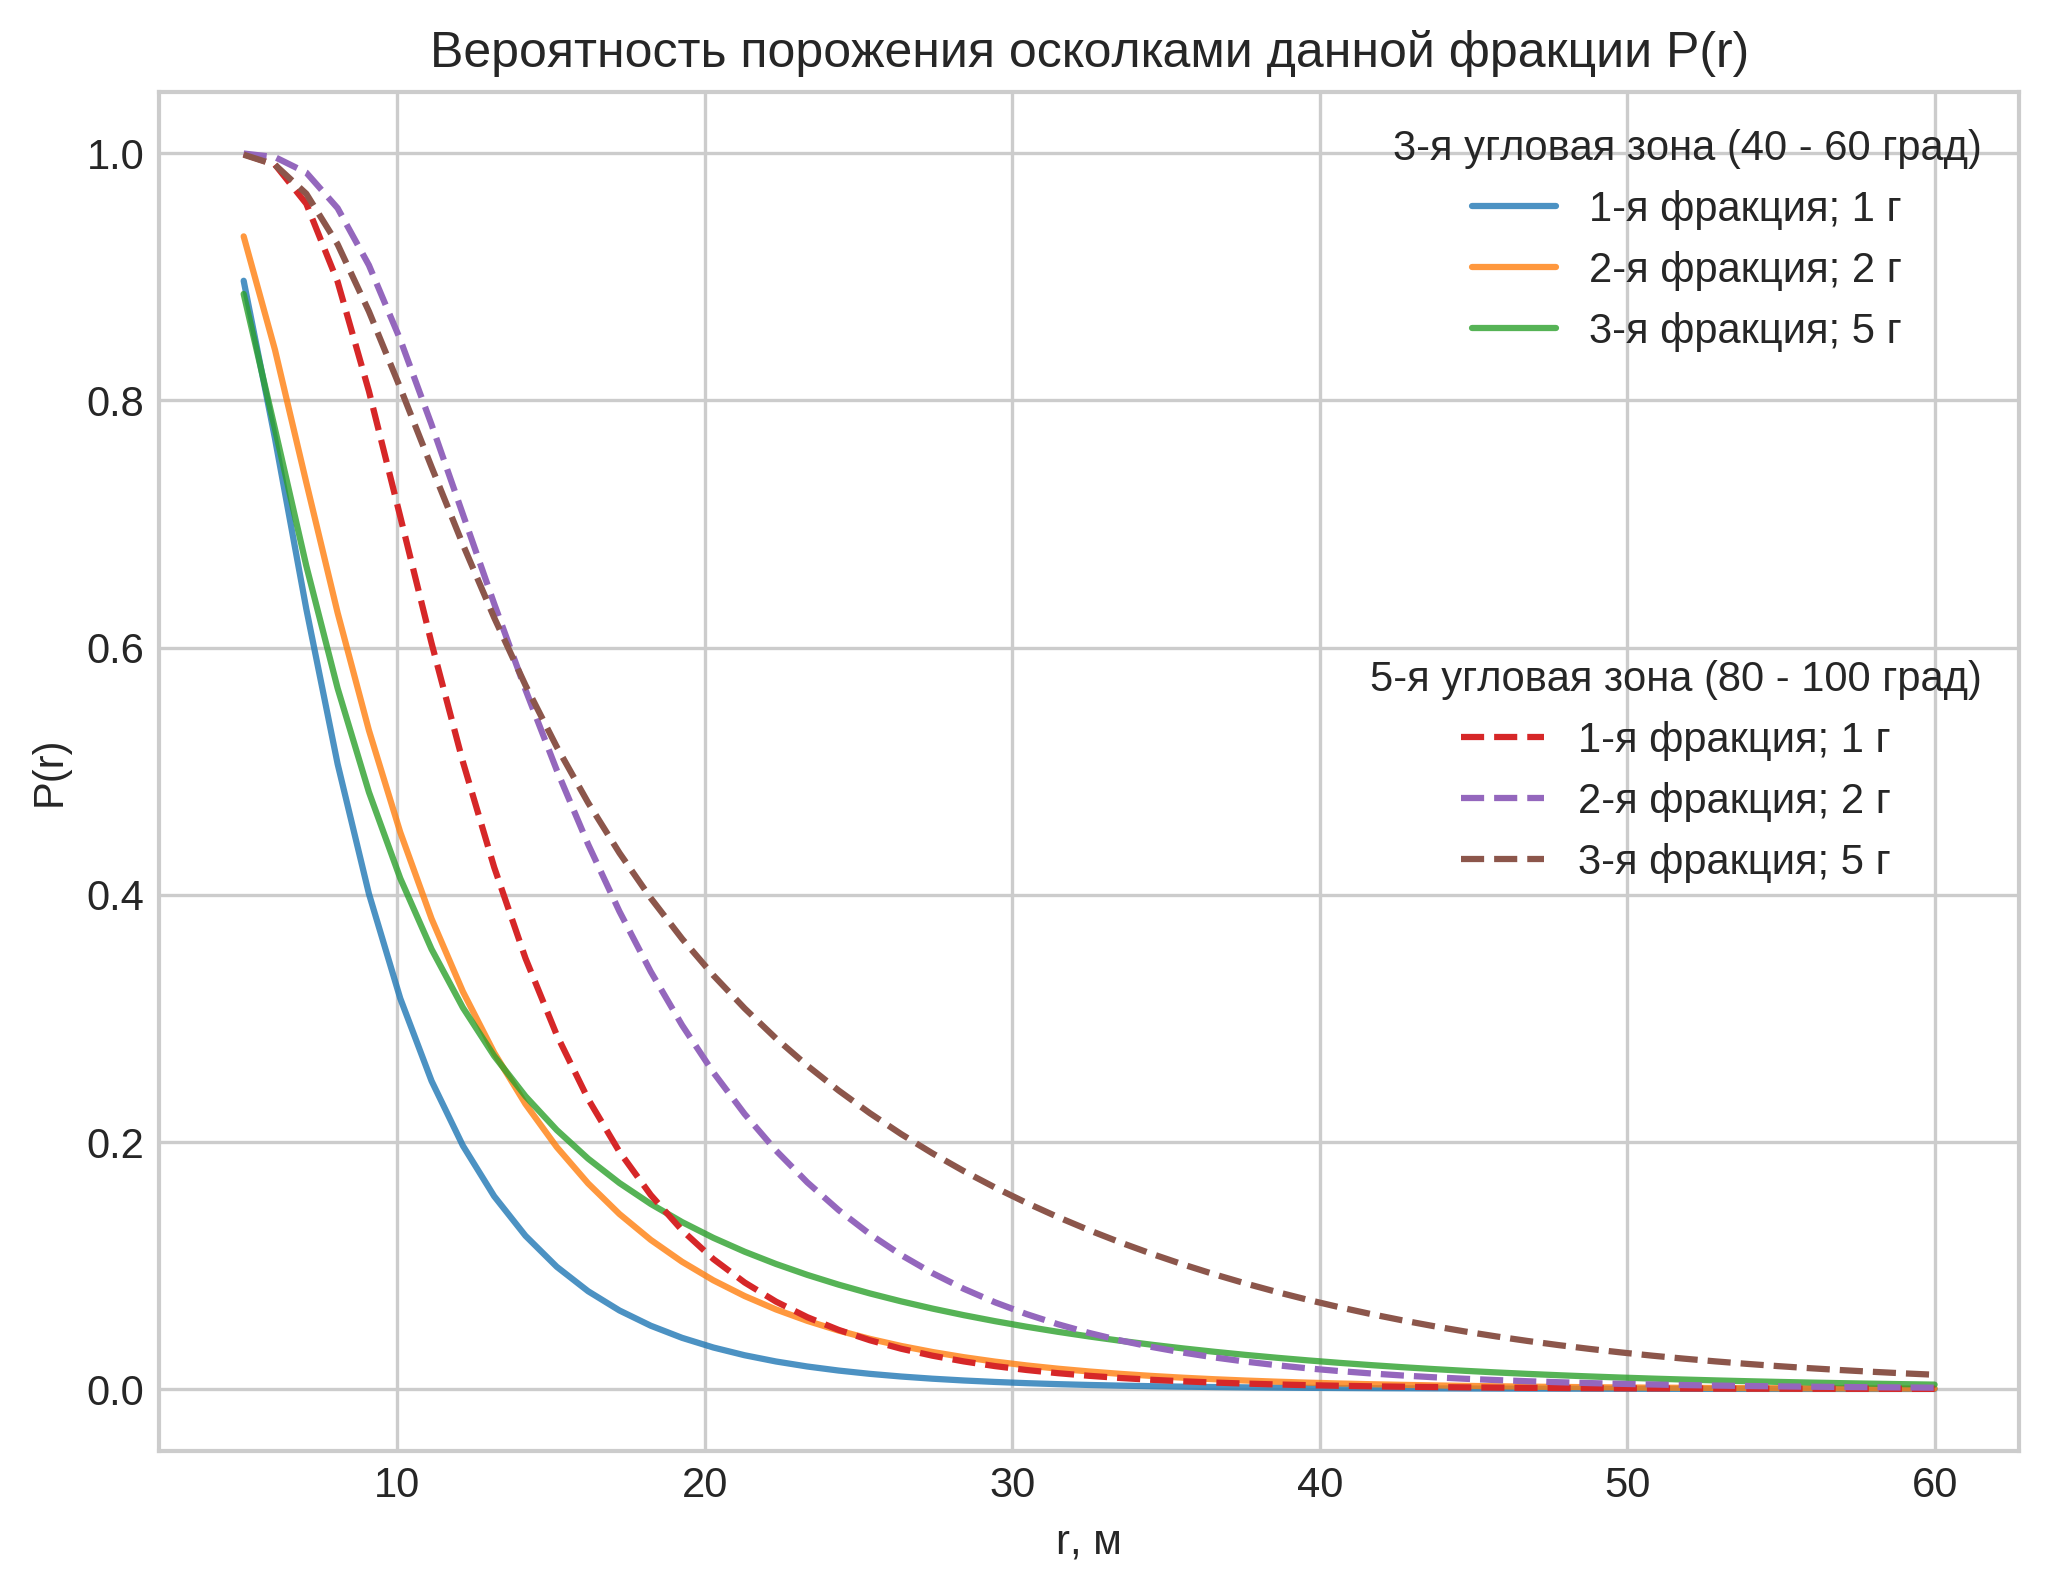

In [18]:
Ploter(P, tit="Вероятность порожения осколками данной фракции P(r)", yl="P(r)")

In [19]:
# Передний угол на местности (град)
# Под аркосинусное выражение
u_ac1 = np.cos(gamma_1*np.pi/180.)/np.cos(TETA_c*np.pi/180.)
# Маска для отсеевания существующих углов
mask_1 = (u_ac1>=-1) & (u_ac1<=1)

# Задний угол на местности (град)
# Под аркосинусное выражение
u_ac2 = np.cos(gamma_2*np.pi/180.)/np.cos(TETA_c*np.pi/180.)
# Маска для отсеевания существующих углов
mask_2 = (u_ac2>=-1) & (u_ac2<=1)

# Так что бы и передний и задний углы попали
# область определения
mask = mask_1 & mask_2
# Сам передний угол на местности (град)
ksi_1 = np.arccos(u_ac1[mask])*180./np.pi
# Сам Задний угол на местности (град)
ksi_2 = np.arccos(u_ac2[mask])*180./np.pi

# G по углам на местности
G_ground = G[:, mask]

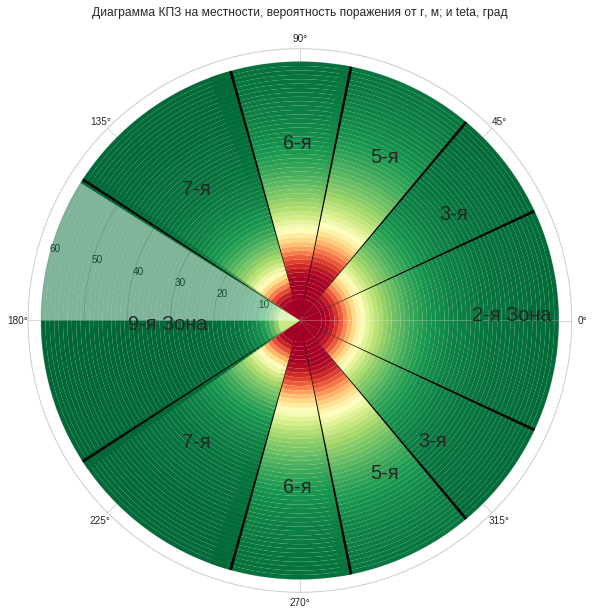

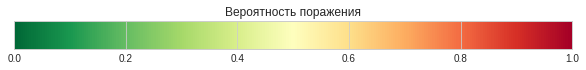

In [20]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='polar')
ax.set_title("Диаграмма КПЗ на местности, вероятность поражения от r, м; и teta, град")
teta = ((ksi_2 + ksi_1)/2)*np.pi/180. # Было ksi_1
width = (ksi_2 - ksi_1)*np.pi/180.
r_var = r[:,0]
cmap = plt.cm.get_cmap('RdYlGn')
colors = np.array(cmap(np.arange(cmap.N)[::-1]))
bottom = 0
alpha = 1
for i in range(len(r_var)):
    h = r_var[i] - bottom
    color_numbers = np.array(G_ground[i, :]*cmap.N, dtype=int)
    ax.bar(teta, h, width=width, alpha=alpha, bottom=bottom, color=colors[color_numbers])
    ax.bar(-teta, h, width=-width, alpha=alpha, bottom=bottom, color=colors[color_numbers])
    # Ручная, грубая, громозкая подгонка, которая лишает 
    # программу всей ее универсальности
    
    #Зона 1
    teta_podgona = ((0 + 25)/2)*np.pi/180.
    width_podgona = (25 - 0)*np.pi/180.
    color_numbers_podgona = np.array(G[i, 1]*cmap.N, dtype=int)
    ax.bar(teta_podgona, h, width=width_podgona, alpha=alpha, bottom=bottom, color=colors[color_numbers_podgona])
    ax.bar(-teta_podgona, h, width=width_podgona, alpha=alpha, bottom=bottom, color=colors[color_numbers_podgona])
    #Зона 2
    teta_podgona = ((25 + 50)/2)*np.pi/180.
    width_podgona = (50 - 25)*np.pi/180.
    color_numbers_podgona = np.array(G[i, 2]*cmap.N, dtype=int)
    ax.bar(teta_podgona, h, width=width_podgona, alpha=alpha, bottom=bottom, color=colors[color_numbers_podgona])
    ax.bar(-teta_podgona, h, width=width_podgona, alpha=alpha, bottom=bottom, color=colors[color_numbers_podgona])
    #Зона 7
    teta_podgona = ((145 + 180)/2)*np.pi/180.
    width_podgona = (180 - 145)*np.pi/180.
    color_numbers_podgona = np.array(G[i, 7]*cmap.N, dtype=int)
    ax.bar(teta_podgona, h, width=width_podgona, alpha=0.5, bottom=bottom, color=colors[color_numbers_podgona])
    ax.bar(-teta_podgona, h, width=width_podgona, alpha=alpha, bottom=bottom, color=colors[color_numbers_podgona])
    
    bottom = r_var[i]
    
ax.set_rlabel_position(165) 
# Подписи зон, которые тоже далеки от идеала
ax.text(0, 40, "2-я Зона", fontsize=20)
ax.text(np.pi/5, 40, "3-я", fontsize=20)
ax.text(-np.pi/5-np.pi/17, 40, "3-я", fontsize=20)
ax.text(ksi_2[0]*np.pi/180.-np.pi/12, 40, "5-я", fontsize=20)
ax.text(-ksi_2[0]*np.pi/180.+np.pi/12, 40, "5-я", fontsize=20)
ax.text(ksi_2[1]*np.pi/180.-np.pi/12, 40, "6-я", fontsize=20)
ax.text(-ksi_2[1]*np.pi/180.+np.pi/12, 40, "6-я", fontsize=20)
ax.text(ksi_2[2]*np.pi/180.-np.pi/12, 40, "7-я", fontsize=20)
ax.text(-ksi_2[2]*np.pi/180.+np.pi/12, 40, "7-я", fontsize=20)
ax.text(np.pi+np.pi/60, 40, "9-я Зона", fontsize=20)

# Границы зон
teta_boun = list(ksi_1*np.pi/180.)
teta_boun.append(147*np.pi/180.)
teta_boun.append(25*np.pi/180.)
teta_boun = np.array(teta_boun)
ax.bar(teta_boun, 60, width=0.6*np.pi/180., alpha=1, bottom=0, color='black')
ax.bar(-teta_boun, 60, width=0.6*np.pi/180., alpha=1, bottom=0, color='black')

# Цветовая шкала 
fig_bar = plt.figure(figsize=(10,2))
ax_bar = plt.axes()
ax_bar.set_title("Вероятность поражения")
ax_bar.set_yticks([])
ax_bar.imshow([colors], extent=[0, 1, 0, 0.05]);

In [21]:
# Импорт библиотеки для показа таблиц
import pandas as pd

In [22]:
# Формирование таблицы угловых зон
num_area = [1, 2, 3, 4, 5, 6, 7, 8 ,9] # Номера угловаых зон
num_area = np.array(num_area) # 
fi_seria = pd.Series(fi, index=num_area) # Средний угол в статике
v_0_seria = pd.Series(v_0, index=num_area) # Средняя начальная скорость в статике 
gamma_1_seria = pd.Series(gamma_1, index=num_area) # Передний угол в динамике
gamma_2_seria = pd.Series(gamma_2, index=num_area) # Задний угол в динамике
gamma_seria = pd.Series(gamma, index=num_area) # Средний угол в динамике
v_d_seria = pd.Series(v_d, index=num_area) # Результирующая скорость
mu_seria = pd.Series(mu_r, index=num_area) # Отностительная масса осколков на местности
M_seria = pd.Series(M, index=num_area) # Масса осколков на местности

In [23]:
ksi_1_s = np.arccos(u_ac1[mask_1])*180./np.pi
ksi_1_seria = pd.Series(ksi_1_s, index=num_area[mask_1]) # Передний угол на местности
ksi_2_s = np.arccos(u_ac2[mask_2])*180./np.pi
ksi_2_seria = pd.Series(ksi_2_s, index=num_area[mask_2]) # Задний угол на местности 
ksi_s = (ksi_2 + ksi_1)/2
ksi_seria = pd.Series(ksi_s, index=num_area[mask]) # Средний угол на местности 

In [24]:
Table1 = pd.DataFrame(fi_seria, columns=['Средний угол в статике, град']) # Характеристики угловых зон
Table1['Средняя начальная скорость в статике, м/с'] = v_0_seria
Table1['Передний угол в динамике, град'] = gamma_1_seria
Table1['Задний угол в динамике, град'] = gamma_2_seria
Table1['Средний угол в динамике, град'] = gamma_seria
Table1['Результирующая скорость, м/с'] = v_d_seria
Table1['Передний угол на местности, град'] = ksi_1_seria
Table1['Задний угол на местности, град'] = ksi_2_seria
Table1['Задний угол на местности, град'] = ksi_2_seria
Table1['Средний угол на местности, град'] = ksi_seria
Table1['Отностительная масса осколков на местности'] = mu_seria
Table1['Масса осколков на местности, грамм'] = M_seria
pd.options.display.float_format = '{:.1f}'.format
Table1.T # Таблица 1.4 Характеристики угловых зон

,1,2,3,4,5,6,7,8,9
"Средний угол в статике, град",10.0,30.0,50.0,70.0,90.0,110.0,130.0,150.0,170.0
"Средняя начальная скорость в статике, м/с",820.0,890.0,950.0,1020.0,1100.0,1000.0,860.0,710.0,530.0
"Передний угол в динамике, град",0.0,15.0,30.7,47.5,65.6,82.7,99.9,118.1,137.5
"Задний угол в динамике, град",14.7,30.2,46.7,64.6,84.3,103.0,123.0,146.5,180.0
"Средний угол в динамике, град",7.3,22.6,38.7,56.0,74.9,92.8,111.4,132.3,158.8
"Результирующая скорость, м/с",1118.2,1172.6,1198.9,1213.4,1213.1,1029.7,800.6,554.3,272.9
"Передний угол на местности, град",nan,nan,nan,nan,50.0,78.6,105.5,137.2,nan
"Задний угол на местности, град",nan,nan,nan,48.1,81.0,110.5,147.9,nan,nan
"Средний угол на местности, град",nan,nan,nan,nan,65.5,94.5,126.7,nan,nan
Отностительная масса осколков на местности,0.0,0.0,0.1,0.1,0.3,0.3,0.1,0.0,0.1


In [25]:
ind_x = pd.MultiIndex.from_arrays([np.array(["№ угловой зоны"]*9), num_area])
ind_y = pd.MultiIndex.from_arrays([np.array(["r, м"]*r.size), r[:, 0]])
Table2 = pd.DataFrame(G, index=ind_y, columns=ind_x)
pd.options.display.float_format = '{:.3f}'.format
Table2 # Таблица 1.6 Оснавная таблица результатов

№ угловой зоны                                                
                         1     2     3     4     5     6     7     8     9
r, м 5.000           1.000 1.000 1.000 1.000 1.000 1.000 0.997 0.369 0.173
     6.019           1.000 0.996 0.996 1.000 1.000 1.000 0.977 0.261 0.116
     7.037           1.000 0.981 0.980 0.996 1.000 1.000 0.929 0.190 0.081
     8.056           0.997 0.947 0.946 0.985 1.000 1.000 0.857 0.142 0.059
     9.074           0.988 0.894 0.894 0.959 0.999 0.997 0.771 0.108 0.044
     10.093          0.969 0.829 0.828 0.919 0.996 0.991 0.681 0.084 0.034
     11.111          0.938 0.756 0.756 0.867 0.988 0.976 0.596 0.067 0.026
     12.130          0.896 0.683 0.683 0.807 0.973 0.951 0.518 0.054 0.021
     13.148          0.845 0.612 0.613 0.742 0.950 0.917 0.450 0.044 0.017
     14.167          0.788 0.546 0.547 0.678 0.918 0.874 0.390 0.036 0.014
     15.185          0.730 0.486 0.487 0.615 0.879 0.825 0.338 0.030 0.011
     16.204          0.671 0.432 0.433 0.556 0.834 0.772 0.294 0.025 0.009
     17.222          0.614 0.384 0.385 0.502 0.785 0.717 0.256 0.021 0.008
     18.241          0.560 0.342 0.343 0.452 0.735 0.663 0.224 0.018 0.006
     19.259          0.510 0.305 0.306 0.407 0.685 0.611 0.196 0.015 0.005
     20.278          0.463 0.272 0.273 0.366 0.635 0.561 0.172 0.013 0.005
     21.296          0.421 0.243 0.244 0.330 0.587 0.514 0.152 0.011 0.004
     22.315          0.382 0.218 0.219 0.298 0.542 0.470 0.134 0.010 0.003
     23.333          0.347 0.196 0.197 0.269 0.500 0.429 0.119 0.009 0.003
     24.352          0.315 0.176 0.177 0.243 0.460 0.392 0.105 0.008 0.003
     25.370          0.287 0.159 0.160 0.220 0.423 0.358 0.094 0.007 0.002
     26.389          0.261 0.144 0.144 0.200 0.389 0.326 0.083 0.006 0.002
     27.407          0.237 0.130 0.131 0.182 0.358 0.298 0.075 0.005 0.002
     28.426          0.216 0.118 0.119 0.165 0.329 0.272 0.067 0.005 0.002
     29.444          0.197 0.107 0.108 0.151 0.303 0.248 0.060 0.004 0.001
     30.463          0.180 0.097 0.098 0.138 0.279 0.227 0.054 0.004 0.001
     31.481          0.165 0.089 0.089 0.126 0.257 0.208 0.049 0.003 0.001
     32.500          0.151 0.081 0.082 0.115 0.237 0.190 0.044 0.003 0.001
     33.519          0.138 0.074 0.075 0.105 0.218 0.174 0.040 0.003 0.001
     34.537          0.127 0.068 0.068 0.097 0.201 0.159 0.036 0.002 0.001
     35.556          0.116 0.062 0.063 0.089 0.186 0.146 0.033 0.002 0.001
     36.574          0.107 0.057 0.057 0.082 0.171 0.134 0.030 0.002 0.001
     37.593          0.098 0.052 0.053 0.075 0.158 0.123 0.027 0.002 0.001
     38.611          0.090 0.048 0.049 0.069 0.146 0.113 0.025 0.002 0.000
     39.630          0.083 0.044 0.045 0.064 0.135 0.104 0.022 0.001 0.000
     40.648          0.076 0.041 0.041 0.059 0.125 0.096 0.020 0.001 0.000
     41.667          0.070 0.037 0.038 0.054 0.116 0.088 0.019 0.001 0.000
     42.685          0.065 0.035 0.035 0.050 0.107 0.081 0.017 0.001 0.000
     43.704          0.060 0.032 0.032 0.046 0.099 0.075 0.016 0.001 0.000
     44.722          0.055 0.029 0.030 0.043 0.092 0.069 0.014 0.001 0.000
     45.741          0.051 0.027 0.028 0.040 0.085 0.064 0.013 0.001 0.000
     46.759          0.047 0.025 0.026 0.037 0.079 0.059 0.012 0.001 0.000
     47.778          0.044 0.023 0.024 0.034 0.074 0.055 0.011 0.001 0.000
     48.796          0.041 0.022 0.022 0.032 0.068 0.051 0.010 0.001 0.000
     49.815          0.038 0.020 0.020 0.029 0.064 0.047 0.009 0.001 0.000
     50.833          0.035 0.019 0.019 0.027 0.059 0.044 0.009 0.000 0.000
     51.852          0.033 0.017 0.018 0.025 0.055 0.040 0.008 0.000 0.000
     52.870          0.030 0.016 0.016 0.024 0.051 0.038 0.007 0.000 0.000
     53.889          0.028 0.015 0.015 0.022 0.048 0.035 0.007 0.000 0.000
     54.907          0.026 0.014 0.014 0.020 0.045 0.032 0.006 0.000 0.000
     55.926          0.024 0.013 0.013 0.019 0.042 0.030 0.006 0.000 0.000
     56.944          0.023 0.012 0.01